<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [161]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [162]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [163]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [164]:
# Answer:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [175]:
# Answer:
duration_sort = movies.sort_values('duration', ascending = False)
longest = duration_sort.iloc[0:1,:]
shortest = duration_sort.iloc[-1:,:]
print("Shortest:", shortest)
print("Longest:", longest)

Shortest:      star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  
Longest:      star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

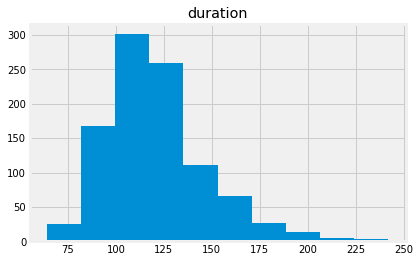

In [177]:
# Answer:
fig, ax = plt.subplots()
movies.hist('duration', ax=ax, bins = 10);

#### Use a box plot to display that same data.

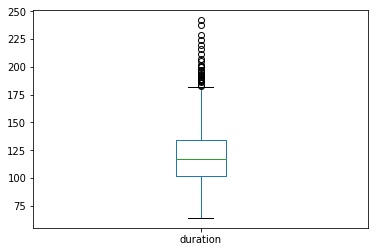

In [8]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'duration'].plot(kind='box', ax=ax);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

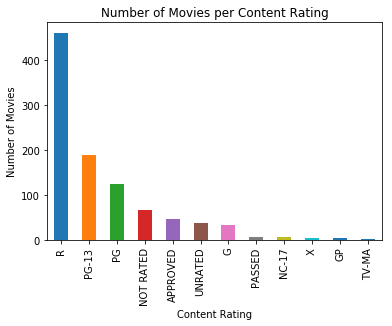

In [10]:
# Answer:
fig, ax = plt.subplots()
movies.loc[:, 'content_rating'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Content Rating')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies per Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
unrated_movies = movies.loc[:, 'content_rating'].isin(['NOT RATED', 'APPROVED', 'PASSED', 'GP'])
ratingschangedf = movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')
ratingschangedf.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
ratingschangedf.replace(['X', 'TV-MA'], 'NC-17', inplace=True)
ratingschangedf.loc[:,'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:
ratingschangedf.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
#Look at rows where content_rating is null (there are only 3):
ratingschangedf.loc[ratingschangedf.loc[:,'content_rating'].isnull(), :]
#genres are  biography, action, & adventure

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [15]:
#Check what content ratings are most common for each genre and replace NaN values accordingly
ratingschangedf.groupby(['genre', 'content_rating']).count()
# Action: 'R' is most common
# Adventure: 'PG-13' is most common 
# Biography: 'R' is most common

ratingschangedf.loc[ratingschangedf.loc[:, 'title'] == 'Butch Cassidy and the Sundance Kid', 'content_rating'] = 'R'
ratingschangedf.loc[ratingschangedf.loc[:, 'title'] == 'Where Eagles Dare', 'content_rating'] = 'R'
ratingschangedf.loc[(ratingschangedf.loc[:, 'title'] == 'True Grit') & (ratingschangedf.loc[:, 'duration'] == 128), 'content_rating'] = 'PG-13'



NOTE: 'True Grit' is in this table twice (original + remake), as found a few entries below this.  The other 'True Grit' entry is also rated 'PG-13', so the rating replacement checks out.  I added the extra boolean logic to the True Grit replacement to ensure it only replaces this entry, not both!

Additionally - python gave an indexing error when I tried to use the .replace() method here, because the ratingschangedf dataframe is already a copy of the original dataframe.  The reassignment method above works.

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
avg_rating_2plus_hours = round(movies.loc[movies.loc[:, 'duration'] >=120, 'star_rating'].mean(), 3)
avg_rating_under2hours = round(movies.loc[movies.loc[:, 'duration'] <120, 'star_rating'].mean(), 3)
print("Average rating for 2+ hour movies:", avg_rating_2plus_hours)
print("Average rating for <2 hour movies:", avg_rating_under2hours)
if avg_rating_2plus_hours > avg_rating_under2hours:
    print("2+ hour movies are typically rated higher than those under 2 hours.")
else:
    print("Movies with durations under 2 hours are typically rated higher than those over 2 hours.")

Average rating for 2+ hour movies: 7.949
Average rating for <2 hour movies: 7.839
2+ hour movies are typically rated higher than those under 2 hours.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

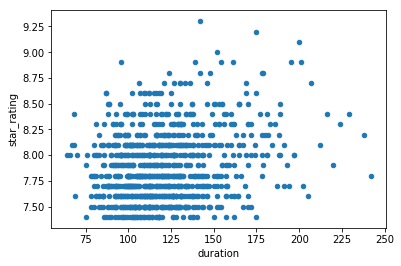

In [17]:
# Answer:
fig, ax = plt.subplots()
movies.plot(kind='scatter', x='duration', y= 'star_rating', ax=ax);

There appears to be some positive correlation between star rating & duration, but not all that strong, especially if we just look at that clump in the middle.  Confirmed via running movies.corr() below, which shows a correlation of .23 -- positive correlation, but not extreme.

In [18]:
movies.corr()

,star_rating,duration
star_rating,1.000000,0.227149
duration,0.227149,1.000000


#### Calculate the average duration for each genre.

In [19]:
# Answer:
movies.loc[:, ['genre', 'duration']].groupby('genre').mean()
# or...(prints out both star rating & duration): 
#movies.groupby('genre').mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

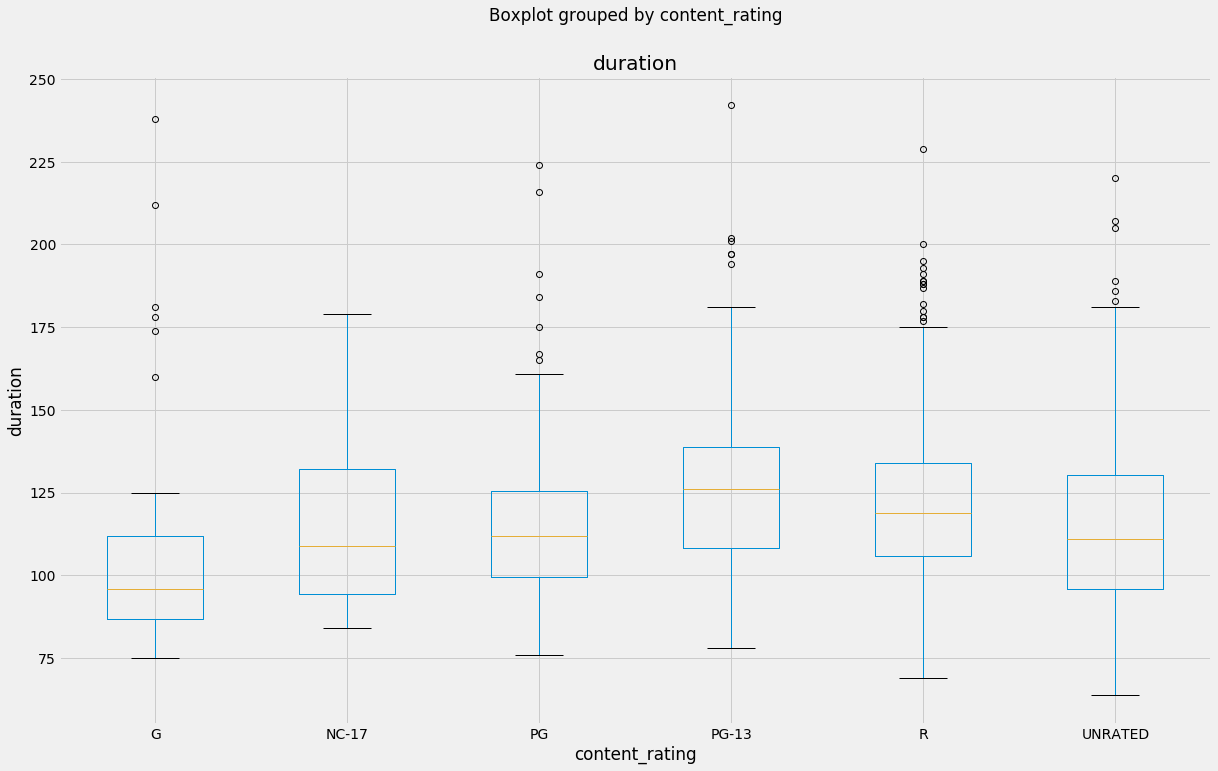

In [148]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (20,12))
ratingschangedf.boxplot(column='duration', by='content_rating', ax=ax)
ax.set_xlabel('content_rating')
ax.set_ylabel('duration');

Methodology: 
- Plot boxplots of duration by each content rating, in order to view median & spread of each

As we go from G -> NC-17 (excluding unrated movies), median duration tends to increase, peaking at PG-13, though NC-17 gets shorter.  Unrated movies have a larger range of durations than any rated category (once we remove outliers); NC-17 is the only category without outliers, though also has the lowest count of any rating.

#### Determine the top rated movie (by star rating) for each genre.

In [152]:
# Answer:
genres = list(ratingschangedf.loc[:,'genre'].unique())
top_rated_per_genre = {}

for value in genres:
    tempdf = ratingschangedf.loc[ratingschangedf.loc[:, 'genre'] == value, :]
    highest_rated_title = list(tempdf.nlargest(1, 'star_rating')['title'])
    highest_rated_stars = list(tempdf.nlargest(1,'star_rating')['star_rating'])
    top_rated_per_genre[value] = highest_rated_title + highest_rated_stars 
    
#Note, converted to list objects as a way to not have printout include the 'dtype=object' part
    
top_rated_per_genre

{'Action': ['The Dark Knight', 9.0],
 'Adventure': ['The Lord of the Rings: The Return of the King', 8.9],
 'Animation': ['Spirited Away', 8.6],
 'Biography': ["Schindler's List", 8.9],
 'Comedy': ['Life Is Beautiful', 8.6],
 'Crime': ['The Shawshank Redemption', 9.3],
 'Drama': ['12 Angry Men', 8.9],
 'Family': ['E.T. the Extra-Terrestrial', 7.9],
 'Fantasy': ['The City of Lost Children', 7.7],
 'Film-Noir': ['The Third Man', 8.3],
 'History': ['Battleship Potemkin', 8.0],
 'Horror': ['Psycho', 8.6],
 'Mystery': ['Rear Window', 8.6],
 'Sci-Fi': ['Blade Runner', 8.2],
 'Thriller': ['Shadow of a Doubt', 8.0],
 'Western': ['The Good, the Bad and the Ugly', 8.9]}

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
# Get count of each title; if count > 1, it's a duplicate - print out to determine if they're exactly the same.

title_counts = ratingschangedf.groupby('title').count().sort_values(by='star_rating', ascending = False)
duplicate_titles = list(title_counts.loc[title_counts.loc[:, 'star_rating'] > 1, :].index)
duplicate_title_rows = ratingschangedf.loc[ratingschangedf.loc[:, 'title'].isin(duplicate_titles), :].sort_values(by='title')
duplicate_title_rows

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


A: all duplicates have different sets of actors & different lengths, which leads me to believe these are different versions/remakes rather than actual duplicates.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:
ratingschangedf.groupby('genre').count() #view list of genres and their counts, then manually add each one with count>9 to a list

genres_highvolume = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery']

ratingschangedf.loc[ratingschangedf.loc[:, 'genre'].isin(genres_highvolume), ['genre', 'star_rating']].groupby('genre').mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [24]:
# Answer:
genre_value_counts = ratingschangedf.loc[:, 'genre'].value_counts()
genre_value_counts = genre_value_counts[genre_value_counts > 9]
ratingschangedf.loc[ratingschangedf.loc[:, 'genre'].isin(genre_value_counts.index), ['genre', 'star_rating']].groupby('genre').mean()

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


In [25]:
genre_counts = ratingschangedf.groupby('genre').count()
top_genres = list(genre_counts.loc[genre_counts.loc[:, 'star_rating'] > 9, :].index)
ratingschangedf.loc[ratingschangedf.loc[:, 'genre'].isin(top_genres), ['genre', 'star_rating']].groupby('genre').mean()


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [26]:
# Answer:
avg_rating_by_genre = ratingschangedf.loc[:, ['genre', 'star_rating']].groupby('genre').mean()
avg_rating_by_genre[avg_rating_by_genre.index.isin(top_genres)]


,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Horror,7.806897
Mystery,7.975000


#### Option 4: aggregate by count and mean, then filter using the count

In [27]:
# Answer:
avg_rating_by_genre = ratingschangedf.loc[:, ['genre', 'star_rating']].groupby('genre').agg(['count', 'mean'])
avg_rating_by_genre.loc[avg_rating_by_genre.loc[:, ('star_rating', 'count')] > 9, :]

star_rating          
                count      mean
genre                          
Action            136  7.884559
Adventure          75  7.933333
Animation          62  7.914516
Biography          77  7.862338
Comedy            156  7.822436
Crime             124  7.916935
Drama             278  7.902518
Horror             29  7.806897
Mystery            16  7.975000

## Bonus

#### Figure out something "interesting" using the actors data!

In [139]:
#Clean up actor lists - get rid of spaces, extra quotes, dedup, etc.

actors_lists = list(movies.loc[:, 'actors_list'])
print(type(actors_lists))
print(len(actors_lists))
print(actors_lists[0:5])

actors_lists= [i.replace("u'", '') for i in actors_lists]
actors_lists= [i.replace('u"', '') for i in actors_lists]
actors_lists= [i.replace('[', '') for i in actors_lists]
actors_lists= [i.replace(']', '') for i in actors_lists]
actors_lists= [i.replace("'", "") for i in actors_lists]

allactorinstances = []
for i in range(0,len(actors_lists)):
    split_lists = actors_lists[i].split(',')
    allactorinstances = allactorinstances + split_lists
allactorinstances= [i.lstrip() for i in allactorinstances]

actorset = set(allactorinstances)

<class 'list'>
979
["[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']", "[u'Marlon Brando', u'Al Pacino', u'James Caan']", "[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']", "[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']", "[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']"]


In [122]:
#find some values by actor - count up # of movies per content rating, average star rating per actor

content_rating_count_by_actor = pd.DataFrame()
avg_star_rating = {}
for i in actorset:
    actor_bool = ratingschangedf.loc[:, 'actors_list'].str.contains(i)
    actor_ratings = ratingschangedf.loc[actor_bool, :]
    actor_ratings = actor_ratings.loc[:, ['content_rating', 'star_rating']].groupby('content_rating').count().transpose()
    actor_ratings = actor_ratings.rename({'star_rating':i}, axis ='index')
    content_rating_count_by_actor = content_rating_count_by_actor.append(actor_ratings)
    actor_avg_star = ratingschangedf.loc[actor_bool, :]
    actor_avg_star = actor_avg_star.loc[:, ['star_rating']].mean()
    avg_star_rating[i] = actor_avg_star

In [124]:
avg_stars = pd.DataFrame(avg_star_rating)
avg_stars = avg_stars.transpose()

In [134]:
actorinfo_joined = avg_stars.join(content_rating_count_by_actor, on=None, how='outer')

In [143]:
# Are average star ratings correlated to # of movies made per content rating?
actorinfo_joined.corr()

#A: PG-13 & G ratings are correlated with higher star ratings

,star_rating,G,NC-17,PG,PG-13,R,UNRATED
star_rating,1.000000,0.118206,-0.083926,0.062548,0.121401,0.045773,0.057813
G,0.118206,1.000000,NaN,-0.092351,0.599433,0.378061,-0.188982
NC-17,-0.083926,NaN,1.000000,NaN,NaN,-0.229416,NaN
PG,0.062548,-0.092351,NaN,1.000000,0.329340,0.067082,0.419474
PG-13,0.121401,0.599433,NaN,0.329340,1.000000,0.273443,0.086429
R,0.045773,0.378061,-0.229416,0.067082,0.273443,1.000000,0.515102
UNRATED,0.057813,-0.188982,NaN,0.419474,0.086429,0.515102,1.000000
